<a href="https://colab.research.google.com/github/AbhayZ1/CNN_model_cifar10/blob/main/Image_classifier_usingCNNs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#This project has been made by Abhay Mahantesh Zalaki.
#I'm using CIFAR-10 dataset for CNN implementation.There are 60,000 32*32 images in the dataset which have to be classified into 10 classes,
#which is the main motive of the model along with getting the specific visualizations
import tensorflow as tf
from tensorflow.keras.datasets import cifar10

# Load the CIFAR-10 datasetcolab
(train_img, train_val), (test_img, test_val) = cifar10.load_data()

In [ ]:
# Normalize pixel values between 0 and 1 for easy implementation
train_img, test_img = train_img / 255.0, test_img / 255.0
# Split given set into training and validation sets, test set defines the ratio of splitting
from sklearn.model_selection import train_test_split
train_imag, val_img, train_val, val_labels = train_test_split(
    train_img, train_val, test_size=0.2, random_state=42)


In [ ]:
#Create the ANN required for the model with CNN filters
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
#This is a custom created CNN model as the VGG16 model was crashing on my laptop and on the colab due to ram requirements
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])



In [ ]:
#Run the model with the
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_imag, train_val, epochs=10,
                    validation_data=(val_img, val_labels), batch_size=64)


Epoch 1/10
625/625 [==============================] - 58s 90ms/step - loss: 1.8506 - accuracy: 0.3123 - val_loss: 1.5010 - val_accuracy: 0.4515
Epoch 2/10
625/625 [==============================] - 50s 80ms/step - loss: 1.5086 - accuracy: 0.4544 - val_loss: 1.3003 - val_accuracy: 0.5323
Epoch 3/10
625/625 [==============================] - 52s 83ms/step - loss: 1.3798 - accuracy: 0.5077 - val_loss: 1.2214 - val_accuracy: 0.5822
Epoch 4/10
625/625 [==============================] - 50s 81ms/step - loss: 1.2885 - accuracy: 0.5408 - val_loss: 1.1424 - val_accuracy: 0.5906
Epoch 5/10
625/625 [==============================] - 50s 81ms/step - loss: 1.2265 - accuracy: 0.5690 - val_loss: 1.0588 - val_accuracy: 0.6238
Epoch 6/10
625/625 [==============================] - 49s 79ms/step - loss: 1.1533 - accuracy: 0.5936 - val_loss: 1.0709 - val_accuracy: 0.6240
Epoch 7/10
625/625 [==============================] - 53s 84ms/step - loss: 1.1103 - accuracy: 0.6128 - val_loss: 0.9983 - val_accuracy:

313/313 [==============================] - 4s 11ms/step - loss: 0.9243 - accuracy: 0.6745
Test accuracy: 0.6745
313/313 [==============================] - 5s 16ms/step
Confusion matrix shape: (10, 10)


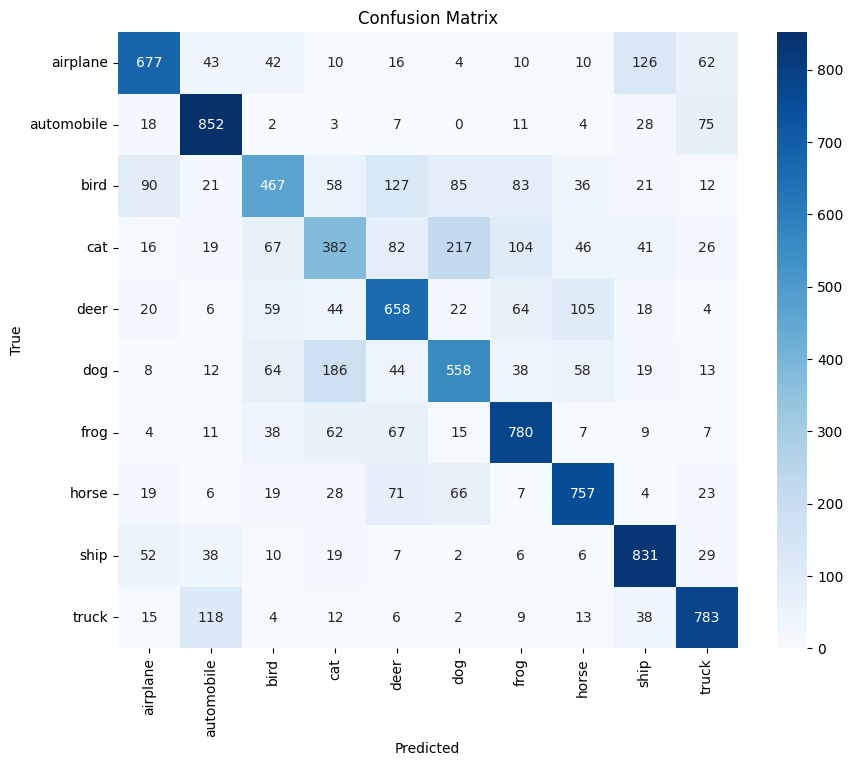

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
test_loss, test_acc = model.evaluate(test_img, test_val)
print(f'Test accuracy: {test_acc:.4f}')

# Make predictions on the test set
predictions = model.predict(test_img)
predicted_labels = np.argmax(predictions, axis=1)
# Generate the confusion matrix
cm = confusion_matrix(test_val, predicted_labels)

# Check the shape of the confusion matrix
print(f"Confusion matrix shape: {cm.shape}")
import seaborn as sns
import matplotlib.pyplot as plt

# CIFAR-10 labels
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Verify the shape of the confusion matrix
assert cm.shape == (10, 10), "Confusion matrix shape does not match the number of classes."

# Set the figure size for better readability
plt.figure(figsize=(10, 8))

# Create a heatmap for the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=cifar10_labels, yticklabels=cifar10_labels)

# Add labels
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create ImageDataGenerator instance for data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

# Fit the data generator on the training images
datagen.fit(train_imag)

# Train the model with augmented data
history = model.fit(
    datagen.flow(train_imag, train_val, batch_size=64),
    epochs=10,
    validation_data=(val_img, val_labels)
)


Epoch 1/10
625/625 [==============================] - 79s 124ms/step - loss: 1.3988 - accuracy: 0.5057 - val_loss: 1.0449 - val_accuracy: 0.6331
Epoch 2/10
625/625 [==============================] - 72s 115ms/step - loss: 1.3334 - accuracy: 0.5314 - val_loss: 1.0093 - val_accuracy: 0.6351
Epoch 3/10
625/625 [==============================] - 73s 116ms/step - loss: 1.3108 - accuracy: 0.5412 - val_loss: 1.1495 - val_accuracy: 0.6023
Epoch 4/10
625/625 [==============================] - 73s 116ms/step - loss: 1.2777 - accuracy: 0.5525 - val_loss: 0.9809 - val_accuracy: 0.6503
Epoch 5/10
625/625 [==============================] - 74s 119ms/step - loss: 1.2527 - accuracy: 0.5621 - val_loss: 1.0129 - val_accuracy: 0.6395
Epoch 6/10
625/625 [==============================] - 72s 115ms/step - loss: 1.2438 - accuracy: 0.5634 - val_loss: 0.9585 - val_accuracy: 0.6576
Epoch 7/10
625/625 [==============================] - 71s 114ms/step - loss: 1.2287 - accuracy: 0.5729 - val_loss: 1.1459 - val_ac

In [ ]:


test_loss, test_acc = model.evaluate(test_img, test_val)
print(f'Test accuracy: {test_acc:.4f}')



313/313 [==============================] - 4s 13ms/step - loss: 0.9615 - accuracy: 0.6681
Test accuracy: 0.6681


Training Accuracy: 59.11%
Validation Accuracy: 66.62%
Test Accuracy: 66.81%


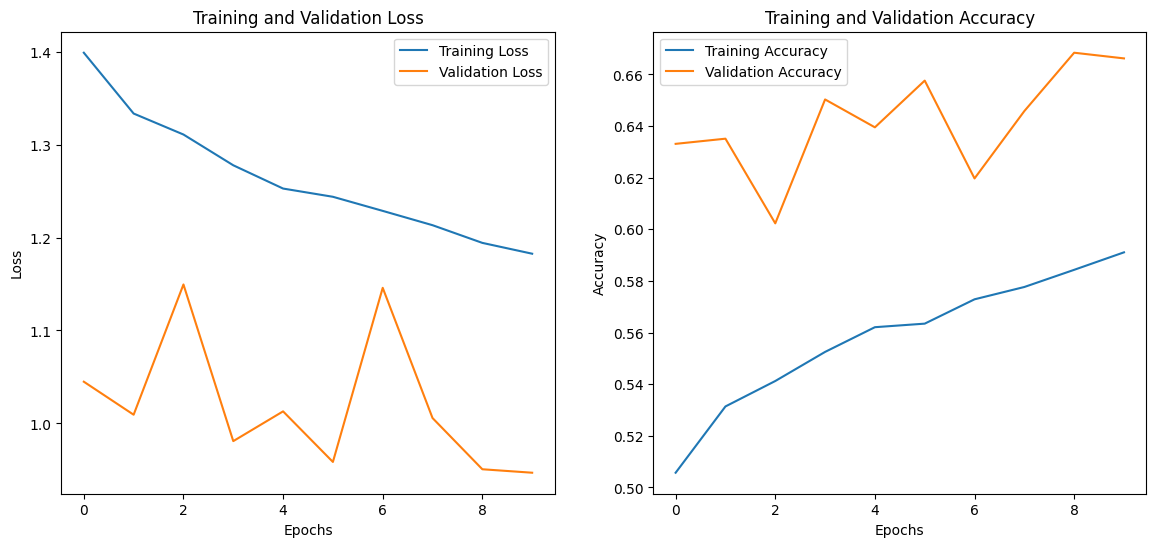

In [ ]:
# Retrieve loss and accuracy values from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot the training and validation loss
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plot the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
training_accuracy = history.history['accuracy'][-1]
validation_accuracy = history.history['val_accuracy'][-1]

print(f"Training Accuracy: {training_accuracy * 100:.2f}%")
print(f"Validation Accuracy: {validation_accuracy * 100:.2f}%")

# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_img, test_val, verbose=0)

print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
plt.show()
